In [1]:
#Importing libreries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.DataFrame(pd.read_csv("Dataset\encoded_dataset.csv")) 

In [3]:
df['Gender'].value_counts()

Gender
m    1414
f    1086
Name: count, dtype: int64

In [4]:
# Label encode the 'Gender' column
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [5]:
print(df.head())

        ID  Gender  PHI  MHI  FI  LD  SCI  UE  TI  APM
0  1711182       1    1    0   1   1    0   1   0    5
1  2312321       0    0    0   1   1    1   1   0    4
2  1510645       0    1    1   0   0    1   0   1    1
3  2311271       1    1    0   1   0    1   1   1    5
4  2211591       1    1    1   0   0    1   0   0    3


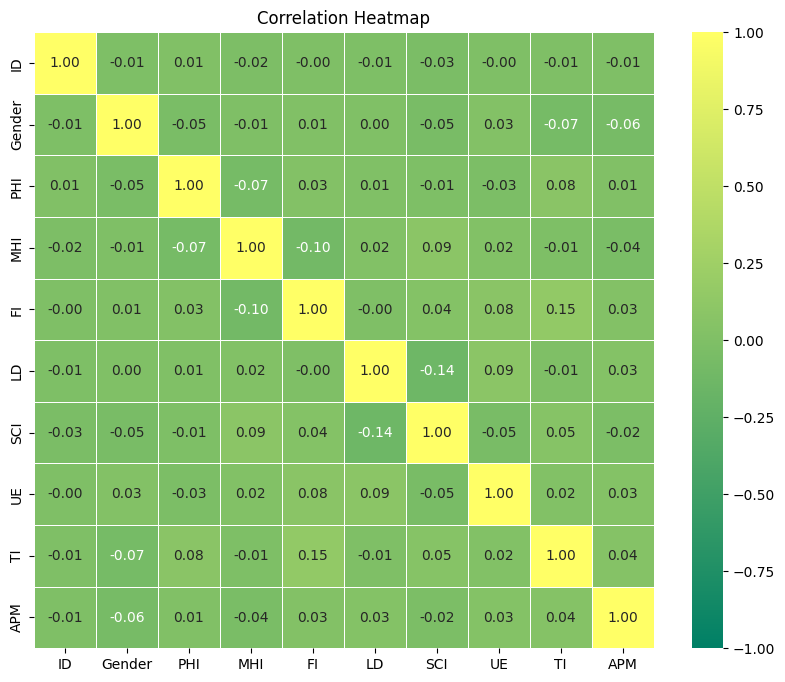

In [6]:
# Correlation matrix
correlation_matrix = df.corr()

# Drop the 'ID' column
df = df.drop(['ID', 'Gender'], axis=1)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap = 'summer', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [7]:
X = df.drop(['APM'], axis=1)
y = df['APM']
print("X shape ",X.shape)
print("y shape ",y.shape)

X shape  (2500, 7)
y shape  (2500,)


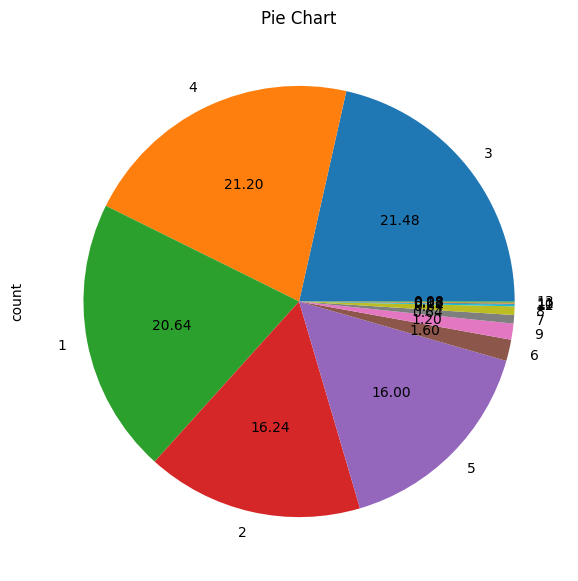

APM
3     537
4     530
1     516
2     406
5     400
6      40
9      30
7      16
8      16
12      3
10      2
11      2
13      2
Name: count, dtype: int64

In [8]:
#understanding the target column
plt.figure(figsize=(7,7))
df['APM'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Pie Chart')
plt.show()

df['APM'].value_counts()

# Data Balance

In [9]:
#Finding Majority and Minority class
class_counts = df['APM'].value_counts()

# Find the majority and minority classes
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()

print("Majority class:", majority_class)
print("Minority class:", minority_class)

Majority class: 3
Minority class: 10


We are combining the minority classes (e.g. classes that have less than 50 samples)

In [10]:
import pandas as pd

# Loading the dataset into a DataFrame
df = pd.read_csv('Dataset\encoded_dataset.csv')

# Drop the 'Gender' column
df.drop('Gender', axis=1, inplace=True)

# Targeted variable 'APM'
class_counts = df['APM'].value_counts()

# Defining the threshold for combining minority classes
threshold = 50  
class_mapping = {}

# Iterate over the class counts
for class_label, count in class_counts.items():
    if count < threshold:
        class_mapping[class_label] = '5+'
    else:
        class_mapping[class_label] = str(class_label)  # Keep the original class label

# Map the class labels to their broader categories
df['APM'] = df['APM'].map(class_mapping).fillna(df['APM'])

# Save the updated DataFrame to a new CSV file
df.to_csv('Dataset\encoded_dataset_updated.csv', index=False)


In [11]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [14]:
from imblearn.over_sampling import SMOTE

df1 = pd.read_csv('encoded_dataset_updated.csv')

df1.head

<bound method NDFrame.head of            ID  PHI  MHI  FI  LD  SCI  UE  TI APM
0     1711182    1    0   1   1    0   1   0   4
1     2312321    0    0   1   1    1   1   0   4
2     1510645    1    1   0   0    1   0   1   4
3     2311271    1    0   1   0    1   1   1   5
4     2211591    1    1   0   0    1   0   0   3
...       ...  ...  ...  ..  ..  ...  ..  ..  ..
2495  2011144    1    0   0   0    0   0   0   2
2496  2011138    1    1   1   0    1   0   1   3
2497  2011154    0    0   1   1    0   1   1   4
2498  2011144    0    0   1   0    1   0   0   1
2499  2011121    1    0   0   1    0   0   1   5

[2500 rows x 9 columns]>

Shape of X after SMOTE: (5026, 8)
Shape of y after SMOTE: (5026,)


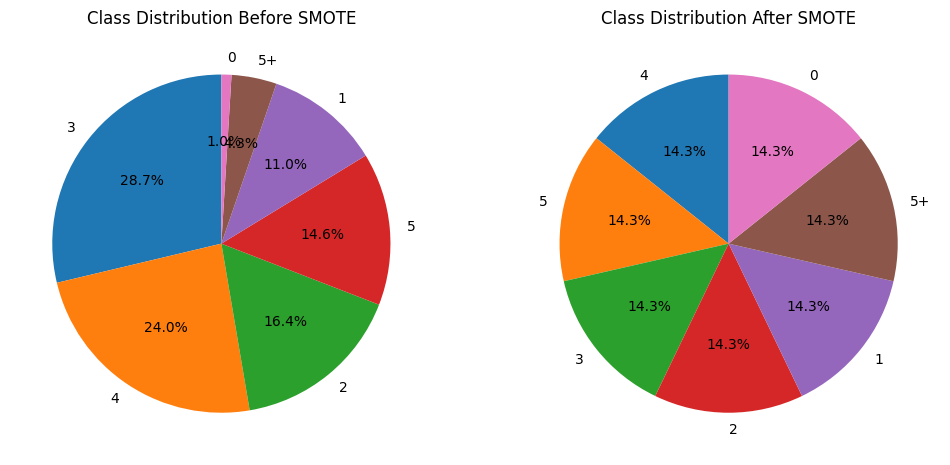

In [15]:
# Cell 3: Apply SMOTE to balance the dataset
# Assuming 'X' contains your features and 'y' contains your target variable
X = df1.drop('APM', axis=1)  # Assuming 'target' is the name of the target variable
y = df1['APM']
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Cell 4: Print the shape of the resampled dataset
print("Shape of X after SMOTE:", X_resampled.shape)
print("Shape of y after SMOTE:", y_resampled.shape)

# Cell 5: Create a pie chart to visualize class distribution before and after SMOTE
# Calculate class distribution before SMOTE
class_counts_before = y.value_counts()

# Calculate class distribution after SMOTE
class_counts_after = pd.Series(y_resampled).value_counts()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot class distribution before SMOTE
axs[0].pie(class_counts_before, labels=class_counts_before.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Class Distribution Before SMOTE')

# Plot class distribution after SMOTE
axs[1].pie(class_counts_after, labels=class_counts_after.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Class Distribution After SMOTE')

# Show the plot
plt.show()

In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=1)

X, y = smote.fit_resample(X, y)

print("X shape after SMOTE:", X.shape)
print("y shape after SMOTE:", y.shape)

X shape after SMOTE: (5026, 8)
y shape after SMOTE: (5026,)


In [17]:
#spliting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=42, test_size =0.2)

In [18]:
y_train.value_counts(normalize=True)*100

APM
1     14.527363
5+    14.502488
5     14.452736
3     14.203980
0     14.203980
2     14.154229
4     13.955224
Name: proportion, dtype: float64

In [19]:
y_test.value_counts(normalize =True)*100

APM
4     15.606362
2     14.811133
3     14.612326
0     14.612326
5     13.618290
5+    13.419483
1     13.320080
Name: proportion, dtype: float64

In [20]:
#stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size =0.2, stratify = y)

In [21]:
y_train.value_counts(normalize=True)*100

APM
1     14.303483
0     14.303483
5     14.278607
2     14.278607
4     14.278607
3     14.278607
5+    14.278607
Name: proportion, dtype: float64

In [22]:
y_test.value_counts(normalize =True)*100

APM
5     14.314115
2     14.314115
4     14.314115
3     14.314115
5+    14.314115
1     14.214712
0     14.214712
Name: proportion, dtype: float64

In [23]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4020, 8) (4020,) (1006, 8) (1006,)


In [24]:
import pickle

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC

print("X shape", X.shape)
print("y shape", y.shape)

pipe = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

X shape (5026, 8)
y shape (5026,)


In [25]:
# Train a logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predictions on the testing set
y_pred = lr.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       143
           1       0.31      0.24      0.27       143
           2       0.42      0.34      0.37       144
           3       0.46      0.52      0.49       144
           4       0.48      0.32      0.38       144
           5       0.32      0.27      0.29       144
          5+       0.62      0.90      0.73       144

    accuracy                           0.51      1006
   macro avg       0.48      0.51      0.49      1006
weighted avg       0.48      0.51      0.49      1006



In [26]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors = 25, )
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [27]:
y_pred = knn.predict(X_test)

In [28]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print('Test Accuracy ', accuracy_score(y_test, y_pred ))
print(classification_report(y_test, y_pred))

Test Accuracy  0.5556660039761432
              precision    recall  f1-score   support

           0       0.80      0.99      0.89       143
           1       0.44      0.45      0.45       143
           2       0.47      0.34      0.39       144
           3       0.47      0.48      0.47       144
           4       0.51      0.38      0.44       144
           5       0.42      0.35      0.38       144
          5+       0.65      0.89      0.75       144

    accuracy                           0.56      1006
   macro avg       0.54      0.56      0.54      1006
weighted avg       0.54      0.56      0.54      1006



In [29]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2,3,4,5,6
0,142,0,1,0,0,0,0
1,19,65,14,16,10,12,7
2,15,49,49,14,6,7,4
3,0,14,13,69,18,22,8
4,0,5,13,26,55,29,16
5,1,14,15,17,11,51,35
6,0,2,0,6,7,1,128


In [30]:
print('Train Accuracy ', accuracy_score(y_train, knn.predict(X_train)))
print(classification_report(y_train, knn.predict(X_train)))

Train Accuracy  0.5985074626865672
              precision    recall  f1-score   support

           0       0.77      0.99      0.87       575
           1       0.53      0.49      0.51       575
           2       0.50      0.44      0.47       574
           3       0.53      0.56      0.54       574
           4       0.52      0.41      0.46       574
           5       0.51      0.41      0.46       574
          5+       0.70      0.89      0.78       574

    accuracy                           0.60      4020
   macro avg       0.58      0.60      0.58      4020
weighted avg       0.58      0.60      0.58      4020



In [31]:
#SVM
from sklearn.svm import SVC

# Creating a Support Vector Machine (SVM) classifier
svm_classifier = SVC()

# Training the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_svm = svm_classifier.predict(X_test)

In [32]:
# Evaluating the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Classifier Accuracy:", accuracy_svm)

# Generating a classification report
print("\nClassification Report for SVM Classifier:")
print(classification_report(y_test, y_pred_svm))

SVM Classifier Accuracy: 0.5924453280318092

Classification Report for SVM Classifier:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       143
           1       0.38      0.34      0.36       143
           2       0.44      0.32      0.37       144
           3       0.57      0.62      0.60       144
           4       0.63      0.58      0.60       144
           5       0.49      0.44      0.47       144
          5+       0.74      0.84      0.79       144

    accuracy                           0.59      1006
   macro avg       0.57      0.59      0.58      1006
weighted avg       0.57      0.59      0.58      1006



In [33]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Creating a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Training the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_rf = rf_classifier.predict(X_test)

In [34]:
# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

# Generating a classification report
print("\nClassification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 0.7445328031809145

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       143
           1       0.69      0.70      0.70       143
           2       0.72      0.66      0.69       144
           3       0.68      0.66      0.67       144
           4       0.64      0.59      0.62       144
           5       0.62      0.73      0.67       144
          5+       0.91      0.97      0.94       144

    accuracy                           0.74      1006
   macro avg       0.75      0.74      0.74      1006
weighted avg       0.75      0.74      0.74      1006



In [35]:
from sklearn.tree import DecisionTreeClassifier 
tree_clf = DecisionTreeClassifier(max_depth =5, random_state = 25)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=25)

In [36]:
y_pred = tree_clf.predict(X_test)

In [37]:
print('Test Accuracy ', accuracy_score(y_test, y_pred ))
print(classification_report(y_test,y_pred))

Test Accuracy  0.47813121272365805
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       143
           1       0.39      0.40      0.39       143
           2       0.30      0.07      0.11       144
           3       0.37      0.49      0.42       144
           4       0.38      0.36      0.37       144
           5       0.34      0.26      0.30       144
          5+       0.63      0.77      0.69       144

    accuracy                           0.48      1006
   macro avg       0.44      0.48      0.44      1006
weighted avg       0.44      0.48      0.44      1006



In [38]:
print('Train Accuracy ', accuracy_score(y_train, tree_clf.predict(X_train) ))
print(classification_report(y_train, tree_clf.predict(X_train)))

Train Accuracy  0.5034825870646766
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       575
           1       0.43      0.42      0.43       575
           2       0.48      0.11      0.17       574
           3       0.40      0.56      0.47       574
           4       0.36      0.36      0.36       574
           5       0.40      0.27      0.32       574
          5+       0.69      0.81      0.75       574

    accuracy                           0.50      4020
   macro avg       0.49      0.50      0.47      4020
weighted avg       0.49      0.50      0.47      4020



In [39]:

from sklearn.ensemble import  VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('knear', knn),
        ('lr', lr),
        ('dt', tree_clf),
        ('svm', svm_classifier),
        ('rf', rf_classifier)
    ], 
    voting = 'hard'
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knear', KNeighborsClassifier(n_neighbors=25)),
                             ('lr', LogisticRegression()),
                             ('dt',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=25)),
                             ('svm', SVC()), ('rf', RandomForestClassifier())])

In [40]:
for clf in [knn, lr, svm_classifier, tree_clf, rf_classifier, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.5556660039761432
LogisticRegression 0.5129224652087475
SVC 0.5924453280318092
DecisionTreeClassifier 0.47813121272365805
RandomForestClassifier 0.742544731610338
VotingClassifier 0.6023856858846919


In [41]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4), n_estimators=10,
    learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.43339960238568587